In [1]:
import pandas as pd
import numpy as np
from pydataset import data

In [2]:
mpg = data('mpg')

In [3]:
# 1. 
# Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [4]:
mpg = mpg.assign(average_mpg = (mpg.cty + mpg.hwy) / 2)
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [84]:
# On average, which manufacturer has the best miles per gallon?

mpg.groupby('manufacturer').average_mpg.mean().sort_values(ascending=False).head(5).round(2)

manufacturer
honda         28.50
volkswagen    25.07
hyundai       22.75
subaru        22.43
audi          22.03
Name: average_mpg, dtype: float64

In [6]:
# How many different manufacturers are there?

len(mpg.groupby('manufacturer'))

15

In [7]:
# How many different models are there?
len(mpg['model'].unique())


38

In [8]:
# Do automatic or manual cars have better miles per gallon?
mpg.head()

# mpg.groupby('trans').average_mpg.agg(['mean', 'count'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [85]:
df = mpg.replace(['auto(l5)','auto(av)','auto(l4)','auto(l3)','auto(l6)','auto(s6)','auto(s4)','auto(s5)'], 'auto').replace(['manual(m5)', 'manual(m6)'], 'manual') 

df.groupby('trans').average_mpg.agg(['mean', 'count']).round(2)

,mean,count
trans,,
auto,19.13,157
manual,22.23,77


In [90]:
mpg['trans_category'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg,trans_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,manual


In [10]:
# 2. Joining and Merging

# Copy the users and roles dataframes from the examples above. 
# What do you think a right join would look like? 
# An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})


roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

users, roles

(   id   name  role_id
 0   1    bob      1.0
 1   2    joe      2.0
 2   3  sally      3.0
 3   4   adam      3.0
 4   5   jane      NaN
 5   6   mike      NaN,
    id       name
 0   1      admin
 1   2     author
 2   3   reviewer
 3   4  commenter)

In [ ]:
emplyees = pd.read_sql(sql_query, get_db_url)
employees.to_csv('employees.csv')

    - this creates faster method to access data. 

In [11]:
# # What do you think a right join would look like? 
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [12]:
# # An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

pd.merge(users, roles, how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


In [92]:
# 3. Getting data from SQL databases
# Create a function named get_db_url. It should accept a username, hostname, password, and database name 
# and return a url formatted like in the examples in this lesson.
# Use your function to obtain a connection to the employees database.

from env import host, user, password

get_db_url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
query = """
    SELECT * FROM employees limit 10
"""



pd.read_sql(query, get_db_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [14]:
# Once you have successfully run a query:
#   Intentionally make a typo in the database url. What kind of error message do you see?



url = f'mysql+pymysql://{user}:{password}@{host2}/employees'

query = """
    SELECT * FROM employees limit 10
"""

pd.read_sql(query, url)

NameError: name 'host2' is not defined

In [15]:
#   Intentionally make an error in your SQL query. What does the error message look like?

query = """
    SELECT * FROM employees limit 10
"""


pd.read_sql(query, get_db_url)


#    ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employee' doesn't exist")
#    [SQL: 
#        SELECT * FROM employee limit 10
#    ]
#    (Background on this error at: http://sqlalche.me/e/13/f405)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [93]:
query_titles = '''
SELECT *
FROM titles
'''

query_emp = '''
SELECT *
FROM employees
'''
title_df = pd.read_sql(query_titles, get_db_url)

In [94]:
emp_df = pd.read_sql(query_emp, get_db_url)

In [95]:
pd.merge(emp_df, title_df, how="inner")

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [19]:
pd.read_sql(query_emp, get_db_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [104]:
h_query = '''
SELECT emp_no, title
FROM titles
WHERE to_date > curdate()
'''
titles = pd.read_sql(h_query, get_db_url)
current_emp_titles = titles.groupby('title').emp_no.count().sort_values(ascending=False) 


In [115]:
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'gca'

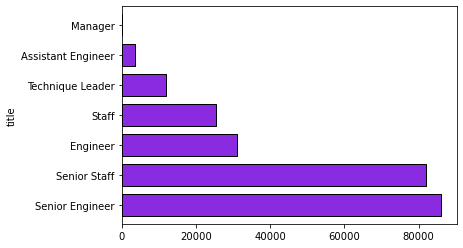

In [116]:


current_emp_titles.plot.barh( color='blueviolet',
                              ec='black',
                             width=.75)



                             
plt.gca().invert_yaxis()                
                             
plt.show()

In [ ]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
# (Hint: this will involve a combination of SQL and python/pandas code)
i_query = """
SELECT *
FROM dept_emp
JOIN departments USING(dept_no)
JOIN titles USING(emp_no)
"""
dept_titles = pd.read_sql(i_query, get_db_url)


In [22]:
pd.crosstab(dept_titles['title'], dept_titles['dept_name']).T

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [60]:
# 4. Use your get_db_url function to help you explore the data from the chipotle database. 
# Use the data to answer the following questions:

get_db_url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

chip = '''
SELECT * 
FROM orders
'''    
    
chipotle = pd.read_sql(chip, get_db_url)
# What is the total price for each order?


In [61]:
chipotle['item_price'] = chipotle['item_price'].str.replace('$','').astype(float)


In [62]:
chipotle['total_price'] = chipotle['quantity'] * chipotle['item_price'] 

In [118]:
# What is the total price for each order?

chipotle.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [77]:
chipotle

,id,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75,8.75


In [122]:
# What are the most popular 3 items?
    
chipotle.groupby(['item_name']).quantity.sum().nlargest(3, keep='all')

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [121]:
# Which item has produced the most revenue?

chipotle.groupby('item_name').item_price.sum().nlargest(1, keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64